# Examen parcial 4  $\color{red}{\text{(10p max)}}$ (Equaciones diferenciales)
* Antes de enviar el archivo, $\textbf{reiniciar y ejecutar el kernel}$ y ver que el archivo se compila sin errores
* enviar el archivo jupyter sin anexos antes de las 10.20am del 08.04.2022 a mi dirección de correo electrónico: michal.hemmerling@udea.edu.co 

In [1]:
#JOSE LUIS TORRES CC: 1010001242
from scipy.integrate import solve_bvp
import numpy as np
import random  
import numpy as np      #LIBRERIAS
import matplotlib.pyplot as plt  
import pandas as pd
import random as rd
from scipy.optimize import curve_fit as CF 
import time 
from scipy import optimize
from scipy.misc import derivative as dv
import sympy as sym
import scipy
from scipy.interpolate import interp1d
from scipy.integrate import solve_ivp as SS
from scipy.integrate import odeint as OO
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np

## Ejercicio 1. $\color{red}{\text{(3p)}}$ Equaciones diferenciales - problema de valor de limite (boundary value problem).

Transporte de calor en un objeto puede ser escrito usando segunda orden equacion diferencial:
$$\frac{d^2T}{dx^2}=0.01T-0.2$$
a) Usando `scipy.integrate.solve_bvp` resolver este equacion diferencial cumpliendo siguientes condiciones de limite:

T(x=0)=40  
T(x=10)=200

b) Hace grafico de T(x) vs x (con etiquietas y legend) 

1.0
1.0
1.0
1.0000000298023224
1.0
1.0
12.690455823952894
12.690455823952894


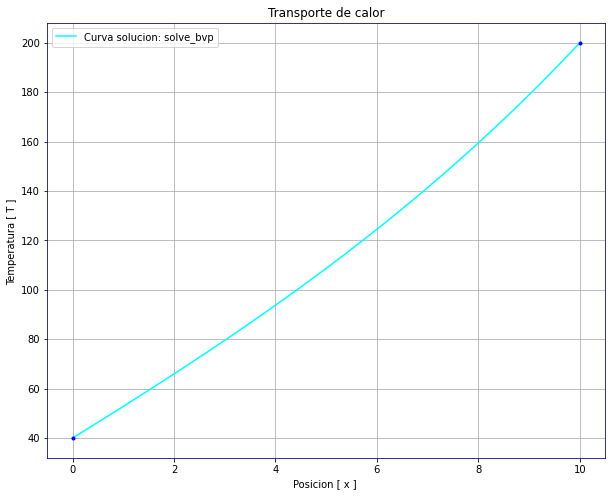

In [7]:
Paso = 100
y0 = np.ones((2,Paso))

#Sistema de ecuaciones
def derivs(t,y):
    dydt=np.zeros((y.shape))

    dydt[0]=y[1]
    dydt[1]=0.01*y[0]-0.2
    return dydt

#Residuos
def bc(ya,yb):

    residuals=np.array([0.0,0.0])
    
    residuals[0]=ya[0] - 40.0
    residuals[1]=yb[0] - 200.0
    print(ya[1])

    return residuals



t = np.linspace(0,10,Paso)

sol = solve_bvp(derivs, bc, t, y0)

#GRAFICO

#fig, ax=plt.subplots(1,1)
fig = plt.figure(figsize = (10,8))
plt.plot(sol.x, sol.y[0],'-',color="cyan",label='Curva solucion: solve_bvp')
plt.plot([0,10],[40,200],'.b')

plt.title("Transporte de calor")
plt.ylabel("Temperatura [ T ] ")
plt.xlabel("Posicion [ x ] ")
plt.legend()
#MARCO
P= plt.gca()
P.spines['right'].set_color('navy') 
P.spines['top'].set_color('navy')
P.spines['bottom'].set_color('navy') 
P.spines['left'].set_color('navy') 
plt.grid()
plt.show()

## Ejercicio 2.  $\color{red}{\text{(4p)}}$ Ecuaciones diferenciales - problema de valor inicial (initial value problem).

La ley de Newton del enfriamiento tiene forma de ecuación diferencial

$$\frac{dy}{dt}=k(y-T_{amb}) $$


donde:
* y es la temperatura actual de un objeto
* t es tiempo
* k es un valor constante de enfriamiento
* $T_{amb}$ es la temperatura del ambiente

Digamos que una taza de café tiene una temperatura inicial de 90 centígrados y la temperatura ambiente es de 25 centígrados.

a) usando `scipy.integrate.solve_ivp` resolver ecuación diferencial:

* para el rango t: t=[0:60], [minutos] (use 100 puntos)
* asumir k=-0.06

b) Hace grafico de $y(t)$ vs $t$ (con leyenda)
* si le gusta tomar café cuando está a más de 70 grados, ¿cuál es el tiempo máximo que puede esperar antes de beber el café (puede obtener índices usando `np.argwhere` para obtener un rango de temperatura más preciso)

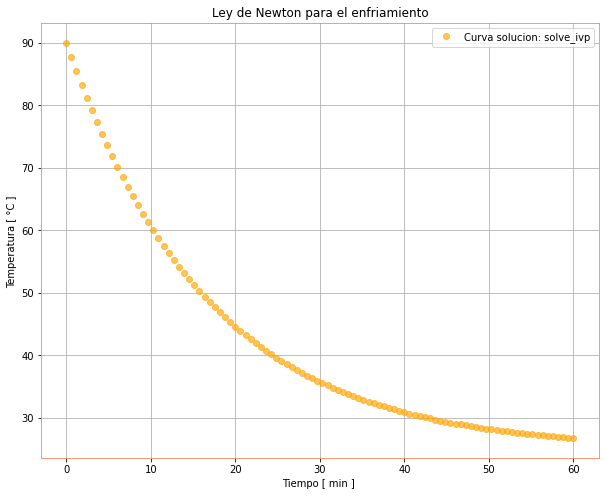

La temperatura es mayor a 70 °C desde la posicion sol.y[0][10] hacia atras 
Tiempo que se debe esperar: 53.93939393939394   Minutos 


In [3]:
#EDO
def Fun(t,y):
    return k*(y-Ta)

t_span=[0,60.0] #Int MINUTOS
myt_eval=np.linspace(0,60.0,100) # Int OPCIONAL
y0=[90] #Condicion de frontera

#Constantes
k=-0.06
Ta=25

#Solucion
sol = solve_ivp(Fun, t_span, y0, method='RK45', t_eval=myt_eval)

#GRAFICO

#fig, ax=plt.subplots(1,1)
fig = plt.figure(figsize = (10,8))
plt.plot(sol.t,sol.y[0],'o',color="orange",label='Curva solucion: solve_ivp',alpha=0.65)

plt.title("Ley de Newton para el enfriamiento")
plt.ylabel("Temperatura [ °C ] ")
plt.xlabel("Tiempo [ min ] ")
plt.legend()
#MARCO
P= plt.gca()
P.spines['right'].set_color('coral') 
P.spines['top'].set_color('coral')
P.spines['bottom'].set_color('coral') 
P.spines['left'].set_color('coral') 
plt.grid()
plt.show()
print(f"La temperatura es mayor a 70 °C desde la posicion sol.y[0][10] hacia atras ")
print(f"Tiempo que se debe esperar: {sol.t[-1]-sol.t[10]}   Minutos ")

## Ejercicio 3.  $\color{red}{\text{(3p)}}$ Equaciones diferenciales - problema de valor de limite (boundary value problem).

Los organizadores de un espectáculo de fuegos artificiales quieren que los fuegos exploten a 40 metros sobre el suelo 5 segundos después del lanzamiento. Encuentra la velocidad inicial del cohete. 

a) usar ecuacion diferencial segunda orden:

$$\frac{d^2y}{dt^2}= −g $$

donde $y$ es altitud de cohete y,   

b) hacer plot $y(t)$ vs $t$


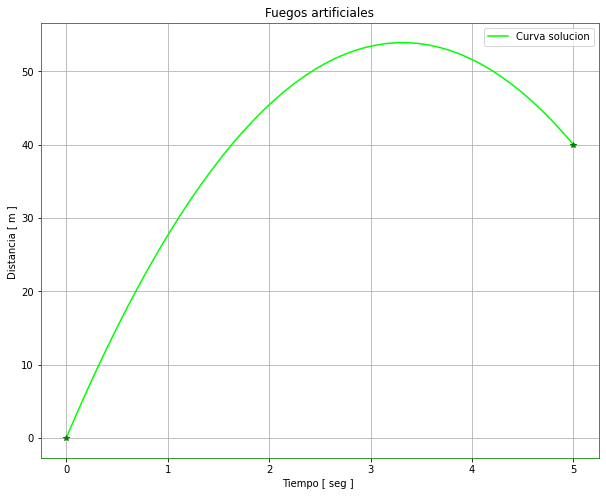

La velocidad inicial del cohete debe ser: 32.02448979591837 [ m/s ] 


In [4]:
P= 50
y0 = np.ones((2,P))

#EDO de Segundo Orden en Sistema De 2 EDO Primer Orden 
def derivs(t,y):
    dydt=np.zeros((y.shape))

    dydt[0]=y[1]
    dydt[1]=-9.81
    return dydt

yi,yf=0,40.0 #Condiciones en METROS

def bc(ya,yb):

    residuals=np.array([0.0,0.0])
    residuals[0]=ya[0] - yi
    residuals[1]=yb[0] - yf
    return residuals


t = np.linspace(0,5,P) #Intervalo de tiempo en SEGUNDOS


sol = solve_bvp(derivs, bc, t, y0)
y_prime = np.gradient(sol.y[0], sol.x)
#GRAFICO

#fig, ax=plt.subplots(1,1)
fig = plt.figure(figsize = (10,8))
plt.plot(sol.x, sol.y[0],'-',color="lime",label='Curva solucion')
plt.plot([0,5],[0,40],'*g')

plt.title("Fuegos artificiales")
plt.ylabel("Distancia [ m ] ")
plt.xlabel("Tiempo [ seg ] ")
plt.legend(loc="best")

#MARCO
P= plt.gca()
P.spines['right'].set_color('g') 
P.spines['top'].set_color('g')
P.spines['bottom'].set_color('g') 
P.spines['left'].set_color('g') 
plt.grid()
plt.show()

print(f"La velocidad inicial del cohete debe ser: {y_prime[0]} [ m/s ] ")

## Ejercicio 4 Ecuaciones diferenciales acopladas - problema de valor inicial `scipy.integrate.solve_ivp` $\color{red}{\text{(10p)}}$ o `otros metodos`  $\color{red}{\text{(7p)}}$

Las ecuaciones de Lotka-Volterra, también conocidas como ecuaciones depredador-presa, son un par de ecuaciones de primer orden, no lineales, ecuaciones diferenciales utilizadas con frecuencia para describir la dinámica de los sistemas biológicos en los que interactúan dos especies, uno como depredador y el otro como presa. Las poblaciones cambian a través del tiempo de acuerdo con el par de ecuaciones:

$$\frac{dx}{dt}=x(\color{red}{\alpha}-\color{red}{\beta} y)$$
$$\frac{dy}{dt}=-y(\color{red}{\gamma}-\color{red}{\delta} x)$$

Esa ecuación describiría la evolución de la población de conejos y zorros (condiciones perfectas)

* x - numbero de conejos  
* y - numbero de zorros

* $\color{red}{\alpha, \beta, \gamma, \delta }$ son parámetros que describen la interacción de las dos especies

* $\frac{dx}{dt}, \frac{dy}{dt}$ representan las tasas de crecimiento de las dos poblaciones a lo largo del tiempo

* $t$ es tiempo

<img src="rabbits_foxes.png" width="400" />

a) solucionar los ecuaciones diferenciales usando `scipy.integrate.solve_ivp` $\color{red}{\text{(10p)}}$ o `otros metodos`  $\color{red}{\text{(7p)}}$
asumir: 
* $\alpha, \beta, \gamma, \delta = 1$
* $x_{ini}=4$
* $y_{ini}=2$
* $t=0:30$ (unidades arbitrarias, asumir meses)

b) hacer plot con dos curvas: $x$ vs. $t$ , $y$ vs. $t$   
c) hacer plot $x vs y$  
d) comentar sobre los dos plots  

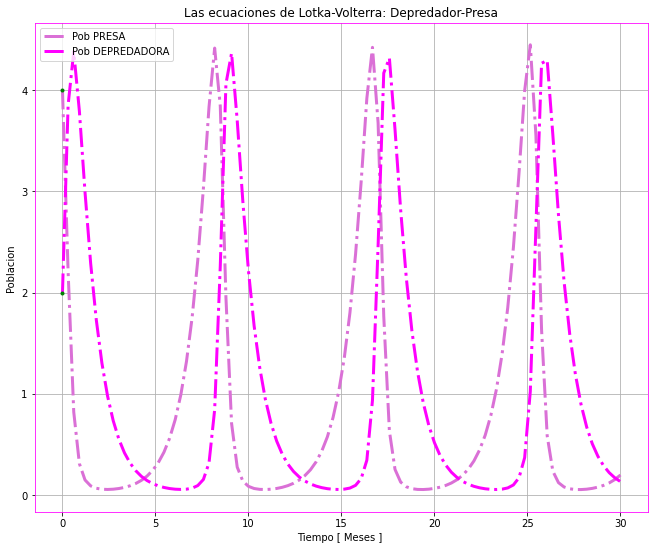

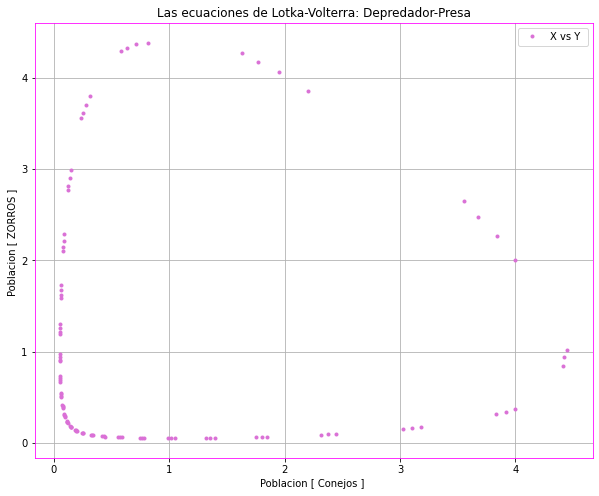

In [5]:
#SISTEMA DE 2 EDO en Primer orden 
def F(x,y):
    dydt=np.zeros((y.shape))

    dydt[0]= y[0] * (a-b*y[1])
    dydt[1]=-y[1] * (r-d*y[0])
    return dydt

t_span=[0,30.0] #Intervalo de MESES
myt_eval=np.linspace(0,30.0,100) # Intervalo OPCIONAL
y01=[4,2] #Condiciones de frontera
a,b,r,d=1,1,1,1
#Solucion
sol = solve_ivp(F, t_span, y01, method='RK45', t_eval=myt_eval)
#GRAFICO

#fig, ax=plt.subplots(1,1)
fig = plt.figure(figsize = (11,9))
plt.plot(sol.t,sol.y[0],"-.", color="orchid",lw=3,label="Pob PRESA")
plt.plot(sol.t,sol.y[1],"-.",color="magenta",lw=3,label="Pob DEPREDADORA")

plt.plot([0,0],[4,2],".g")

plt.title("Las ecuaciones de Lotka-Volterra: Depredador-Presa")
plt.ylabel("Poblacion ")
plt.xlabel("Tiempo [ Meses ] ")
plt.legend(loc="best")

#MARCO
P= plt.gca()
P.spines['right'].set_color('magenta') 
P.spines['top'].set_color('magenta')
P.spines['bottom'].set_color('magenta') 
P.spines['left'].set_color('magenta') 
plt.grid()
plt.show()
print()
print()
#GRAFICO

#fig, ax=plt.subplots(1,1)
fig = plt.figure(figsize = (10,8))
plt.plot(sol.y[0],sol.y[1] ,".", color="orchid",lw=3,label="X vs Y ")

plt.title("Las ecuaciones de Lotka-Volterra: Depredador-Presa")
plt.ylabel("Poblacion [ ZORROS ] ")
plt.xlabel("Poblacion [ Conejos ] ")
plt.legend(loc="best")

#MARCO
P= plt.gca()
P.spines['right'].set_color('magenta') 
P.spines['top'].set_color('magenta')
P.spines['bottom'].set_color('magenta') 
P.spines['left'].set_color('magenta') 
plt.grid()
plt.show()

# Feedback:
```
Exercise 1.
Solution + presentation of the results	            (max 3.0p):	3.0p

Exercise 2.
Solution + presentation of the results	            (max 4.0p):	3.5p
error: print(f"Tiempo que se debe esperar: {sol.t[-1]-sol.t[10]}   Minutos ")

Exercise 3.
Solution + presentation of the results	            (max 3.0p):	3.0p

Exercise 4 ODEINT.
Solution + presentation of the results	            (max 7.0p):	0.0p

Exercise 4 IVP.
Solution + presentation of the results	            (max 10.0p):  10.0p



- Total:                                              (max 10.0p):   10.0p
```